In [34]:
import pandas as pd

In [35]:
import tensorflow as tf

In [36]:
df = pd.read_csv('wisc_bc_data.csv')

In [37]:
# M : 양성, B : 음성 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [38]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [39]:
with open('tmp_test.pkl', 'wb') as f:
    pickle.dump(test_dataset.iloc[0,1:], f)

In [40]:
train_labels = train_dataset.pop('diagnosis')
test_labels = test_dataset.pop('diagnosis')

In [41]:
train_labels.value_counts()

B    295
M    160
Name: diagnosis, dtype: int64

In [42]:
test_labels.value_counts()

B    62
M    52
Name: diagnosis, dtype: int64

In [43]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

In [44]:
train_stats

,count,mean,std,min,25%,50%,75%,max
id,455.0,3.315338e+07,1.329950e+08,8670.000000,868848.500000,907915.000000,8.910502e+06,9.113205e+08
radius_mean,455.0,1.404704e+01,3.495022e+00,6.981000,11.670000,13.270000,1.572000e+01,2.811000e+01
texture_mean,455.0,1.919626e+01,4.360550e+00,9.710000,15.930000,18.770000,2.164000e+01,3.928000e+01
perimeter_mean,455.0,9.139154e+01,2.409068e+01,43.790000,74.720000,85.890000,1.036500e+02,1.885000e+02
area_mean,455.0,6.475051e+02,3.501033e+02,143.500000,418.500000,541.800000,7.641500e+02,2.501000e+03
smoothness_mean,455.0,9.610791e-02,1.392919e-02,0.052630,0.085645,0.095870,1.053000e-01,1.447000e-01
compactness_mean,455.0,1.025301e-01,5.091625e-02,0.023440,0.064710,0.090920,1.297000e-01,3.114000e-01
concavity_mean,455.0,8.642183e-02,7.925265e-02,0.000000,0.028540,0.059290,1.266500e-01,4.268000e-01
points_mean,455.0,4.768017e-02,3.832455e-02,0.000000,0.019655,0.031520,7.202000e-02,2.012000e-01
symmetry_mean,455.0,1.803664e-01,2.695598e-02,0.106000,0.161850,0.178000,1.953500e-01,3.040000e-01


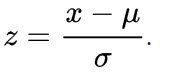

In [45]:
train_dataset.head(1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
512,853612,11.84,18.7,77.93,440.6,0.1109,0.1516,0.1218,0.05182,0.2301,...,16.82,28.12,119.4,888.7,0.1637,0.5775,0.6956,0.1546,0.4761,0.1402


In [46]:
import pickle

with open('./train_stats.pkl', 'wb') as f:
    pickle.dump(train_stats, f)

In [47]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [48]:
normed_train_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
512,-0.242865,-0.631481,-0.113808,-0.558786,-0.590983,1.061949,0.963737,0.446397,0.108020,1.844994,...,0.144019,0.419476,0.388418,0.039412,1.378792,2.152950,2.087322,0.658227,3.397483,3.150390
457,0.419878,1.912136,2.734457,1.839237,2.203621,-0.101794,0.231162,0.634404,1.011879,-0.128594,...,3.421791,3.481834,3.219150,4.553815,0.349988,0.106450,0.390456,0.833024,0.010966,-0.076668
439,-0.183780,-0.657232,0.225599,-0.634749,-0.650394,0.918366,0.227234,-0.227019,-0.268762,0.702390,...,-0.588093,0.112276,-0.523940,-0.572614,0.162536,-0.385076,-0.327115,-0.509822,0.547656,-0.205150
298,-0.242377,-0.565674,-1.320078,-0.562937,-0.577844,0.997337,-0.244325,-0.613378,-0.514035,-0.544086,...,-0.560901,-1.566874,-0.583487,-0.561964,0.873108,-0.555019,-0.488399,-0.589641,-0.144674,-0.168997
37,-0.242745,-0.614314,-1.042590,-0.551314,-0.613262,1.370653,0.531655,-0.622337,-0.460545,0.709810,...,-0.623653,-1.447854,-0.603236,-0.633497,0.450253,0.023439,-0.816763,-0.798624,-0.241279,1.114707


In [49]:
normed_train_data.pop('id')

512   -0.242865
457    0.419878
439   -0.183780
298   -0.242377
37    -0.242745
         ...   
86     0.441072
266   -0.183026
36    -0.242820
193    0.388328
58    -0.242776
Name: id, Length: 455, dtype: float64

In [50]:
normed_test_data.pop('id')

0      0.405925
9     -0.248607
23    -0.242768
28    -0.242530
41    -0.242732
         ...   
544   -0.184537
551   -0.242508
558   -0.242729
559   -0.180777
568   -0.181515
Name: id, Length: 114, dtype: float64

In [51]:
normed_train_data.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
512,-0.631481,-0.113808,-0.558786,-0.590983,1.061949,0.963737,0.446397,0.10802,1.844994,2.209131,...,0.144019,0.419476,0.388418,0.039412,1.378792,2.15295,2.087322,0.658227,3.397483,3.15039


In [52]:
len(normed_train_data.keys())

30

In [53]:
train_dataset.shape

(455, 31)

In [54]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=([len(normed_train_data.keys())])),
      tf.keras.layers.Dense(62, activation='relu'),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(18, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
      ])

#optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 62)                1922      
_________________________________________________________________
dense_4 (Dense)              (None, 18)                1134      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 38        
Total params: 3,094
Trainable params: 3,094
Non-trainable params: 0
_________________________________________________________________


In [56]:
train_labels = train_labels.apply(lambda x : 1 if x == "M" else 0)

In [57]:
train_labels.value_counts()

0    295
1    160
Name: diagnosis, dtype: int64

In [58]:
test_labels = test_labels.apply(lambda x : 1 if x == "M" else 0)

In [59]:
test_labels.value_counts()

0    62
1    52
Name: diagnosis, dtype: int64

In [60]:
model.fit(normed_train_data, train_labels, epochs=10)

Epoch 1/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7076
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.9517
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.9614
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9709
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9737
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9749
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9805
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9717
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9779
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9841


In [61]:
model.evaluate(normed_test_data,  test_labels, verbose=2)

4/4 - 0s - loss: 0.1250 - accuracy: 0.9649


[0.12499111890792847, 0.9649122953414917]

In [62]:
model.predict_classes(normed_test_data)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [63]:
tf.__version__

'2.4.0'

In [64]:
model.save('cancer_model')

INFO:tensorflow:Assets written to: cancer_model\assets


## 오차행렬

* 오차행렬(confusion matrix)은 학습된 분류 모델이 예측을 수행에 대한 평가 지표입니다.
* 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [29]:
confusion_matrix(test_labels,model.predict_classes(normed_test_data) )

array([[60,  2],
       [ 3, 49]], dtype=int64)

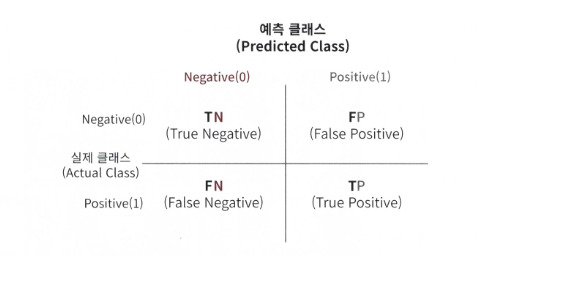

* TN은 예측값을 Negative 값 0으로 예측했고, 실제 값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

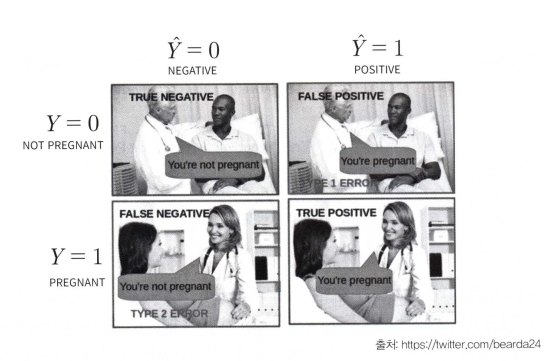

### 정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수 
* (TN + TP) / (TN + FP + FN+TP)

## 불균형한 이진 데이터
* Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생합니다.
* 10,000건의 데이터 중 9,900건이 Negative이고 100건이 Positive라면 Negative로 예측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아지게 됩니다. 
    > 이런 데이터는 무조건 Negativ로 예측해도 정확도는 99%

## 정밀도와 재현율
* Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표 

### 정밀도 = TP / (FP + TP)
* 정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. 
* 공식의 분모인 FP + TP는 예측을 Positive로 한 모든 데이터 건수이며, 분자 TP는 예측과 실제 값이 Positive로 일치한 건수입니다. 
* Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고 합니다.

### 재현율 = TP / (FN + TP)
* 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
* 분모는 실제 값이 Positive인 모든 데이터 건수이며 분자 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수 
* 민감도(Sensitivity) 또는 TRP(True Positive Rate)라고 불립니다. 

* 재현율이 중요 지표인 경우는 실제 Positive양성 데이터를 Negative로 잘못 판단하면 업무상 큰 영향을 발생되기 때문입니다.  

* 재현율은 FN(실제 Positive, 예측 Negative)
* 정밀도는 FP를 낮추는데 초점을 맞춥니다. 
* 이런 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가합니다.

In [30]:
accuracy_score(test_labels,model.predict_classes(normed_test_data) )

0.956140350877193

In [31]:
precision_score(test_labels,model.predict_classes(normed_test_data) )

0.9607843137254902

In [32]:
recall_score(test_labels,model.predict_classes(normed_test_data) )

0.9423076923076923

## 정밀도/재현율 트레이드 오프

* 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조해야 할 경우 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다. 
* 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치가 떨어지기 쉽습니다. 
#### 이를 정밀도/재현율의 트레이드오프(Trade-off)라고 부릅니다. 

* predict_proba()를 수행하면 예측 확률 값이 출력됩니다. 

In [33]:
model.predict_proba(normed_test_data)

Instructions for updating:
Please use `model.predict()` instead.


array([[9.99399781e-01, 6.00243453e-04],
       [9.98573422e-01, 1.42653426e-03],
       [4.56313282e-01, 5.43686688e-01],
       [9.98452544e-01, 1.54746231e-03],
       [1.49058615e-04, 9.99850869e-01],
       [5.72903641e-02, 9.42709565e-01],
       [9.99676824e-01, 3.23172309e-04],
       [1.19814922e-06, 9.99998808e-01],
       [5.62788665e-01, 4.37211394e-01],
       [3.74885887e-01, 6.25114143e-01],
       [5.57648540e-01, 4.42351401e-01],
       [9.99830842e-01, 1.69152976e-04],
       [3.20705175e-01, 6.79294825e-01],
       [9.59390342e-01, 4.06096242e-02],
       [1.20689303e-01, 8.79310668e-01],
       [9.98229206e-01, 1.77076820e-03],
       [9.84267294e-01, 1.57327168e-02],
       [9.87783968e-01, 1.22160129e-02],
       [7.69332886e-01, 2.30667129e-01],
       [9.91774797e-01, 8.22515227e-03],
       [3.43421489e-01, 6.56578481e-01],
       [5.53568676e-02, 9.44643199e-01],
       [9.99536991e-01, 4.63022472e-04],
       [2.25808367e-06, 9.99997735e-01],
       [1.105232

In [34]:
from sklearn.preprocessing import Binarizer

In [35]:
custom_threshold = 0.5

In [43]:
model.predict_proba(normed_test_data)[:,-1].reshape(-1,1)

array([[6.00243453e-04],
       [1.42653426e-03],
       [5.43686688e-01],
       [1.54746231e-03],
       [9.99850869e-01],
       [9.42709565e-01],
       [3.23172309e-04],
       [9.99998808e-01],
       [4.37211394e-01],
       [6.25114143e-01],
       [4.42351401e-01],
       [1.69152976e-04],
       [6.79294825e-01],
       [4.06096242e-02],
       [8.79310668e-01],
       [1.77076820e-03],
       [1.57327168e-02],
       [1.22160129e-02],
       [2.30667129e-01],
       [8.22515227e-03],
       [6.56578481e-01],
       [9.44643199e-01],
       [4.63022472e-04],
       [9.99997735e-01],
       [9.88947630e-01],
       [7.96496719e-02],
       [9.99963164e-01],
       [9.88940179e-01],
       [9.86808002e-01],
       [1.33743748e-01],
       [9.73464429e-01],
       [5.34725726e-01],
       [1.24422266e-04],
       [1.21839868e-03],
       [9.27501787e-06],
       [3.09453253e-03],
       [7.42973745e-01],
       [3.34213255e-04],
       [9.98396337e-01],
       [6.39910474e-02],


In [36]:
pred_proba_1 = model.predict_proba(normed_test_data)[:,-1].reshape(-1,1)

In [38]:
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)

In [39]:
custom_predict = binarizer.transform(pred_proba_1)

In [40]:
custom_predict

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [44]:
confusion_matrix(test_labels, custom_predict )

array([[60,  2],
       [ 3, 49]], dtype=int64)

In [ ]:
array([[60,  2],
       [ 3, 49]]

In [46]:
for thre in [0.5, 0.4, 0.3, 0.2]:
    custom_threshold = thre
    pred_proba_1 = model.predict_proba(normed_test_data)[:,-1].reshape(-1,1)
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    print (confusion_matrix(test_labels, custom_predict ))
    print ("precision : {}".format(precision_score(test_labels, custom_predict )))
    print ("recall : {}".format(recall_score(test_labels, custom_predict )))

[[60  2]
 [ 3 49]]
precision : 0.9607843137254902
recall : 0.9423076923076923
[[58  4]
 [ 2 50]]
precision : 0.9259259259259259
recall : 0.9615384615384616
[[58  4]
 [ 1 51]]
precision : 0.9272727272727272
recall : 0.9807692307692307
[[56  6]
 [ 1 51]]
precision : 0.8947368421052632
recall : 0.9807692307692307


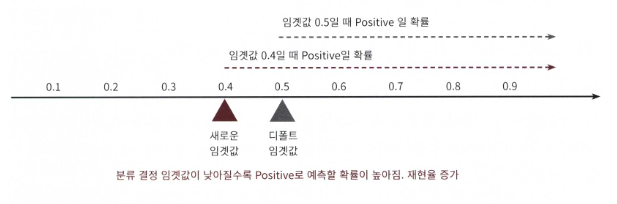

In [87]:
from sklearn.metrics import precision_recall_curve
import numpy as np

In [88]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    



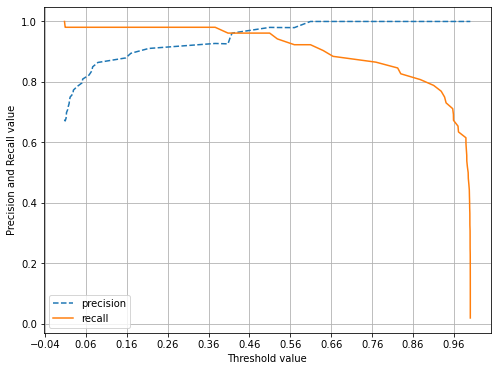

In [89]:
precision_recall_curve_plot( test_labels, model.predict_proba(normed_test_data)[:, 1] )

## F1 스코어
* F1 스코어(Score)는 정밀도와 재현율을 결합한 지표입니다. F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다. 
* F1 스코어의 공식은 다음과 같습니다. 


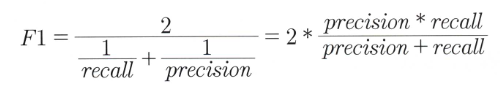



* 예) 정밀도 0.9, 재현율 0.1인 모델 A
* 정밀도 0.5, 재현율 0.5인 모델 B 
* F1의 A는 0.18 B는 0.5

## ROC 곡선과 AUC
* ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표입니다. 
* ROC 곡선(Receiver Operation Characteristic Curve)은 우리말로 수신자 판단 곡선
    > 2차대전 때 통신 장비 성능 평가를 위해 고안된 수치
    
    > 의학 분야에서 많이 사용되고, 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 지표

* ROC 곡선은 FPR(False Positive Rate)이 변활 때 TPR(True Positive Rate)이 어떻게 변하하는지 나타내는 곡선입니다. 
* FPR을 X축으로, TRP을 Y축으로 잡으면 FPR의 변화에 따른 TRP의 변화가 곡선 형태로 나타납니다. 


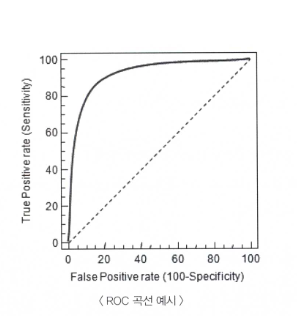

* TPR은 True Positive Rate의 약자이며, 이는 재현율을 나타냅니다. 
* 따라서 TPR은 TP / (FN + TP)입니다.
* TRP은 민감도로 불립니다. 그리고 민감도에 대응하는 자료로 TNR(True Negative Rate)이라고 불리는 특이성(Specificity)이 있습니다. 

* 민감도(TPR)는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냅니다.
    > 질병이 있는 사람은 질병이 있는 것으로 양성 판정
    
* 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냅니다. 
    > 질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정
      

* TNR(True Negative Rate)인 특이성은 다음과 같이 구할 수 있습니다. 
* TNR = TN / (FP + TN)
* ROC 곡선의 X 축 기준인 FPR(False Positive Rate)은 FP / ( FP + TN)이므로 1 - TNR 또는 1 - 특이성으로 표현됩니다. 

* FRP = FP / (FP + TN) = 1 - TNR = 1 - 특이성

#### ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구합니다. 
* 가운데 직선에 가까울수록 성능이 떨어지고 멀어질수록 성능이 높습니다.

In [90]:
from sklearn.metrics import roc_curve

In [101]:
custom_threshold = 0.5
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

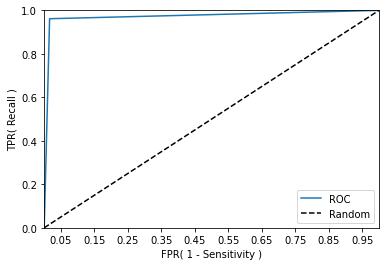

In [102]:
fprs , tprs , thresholds = roc_curve(test_labels, custom_predict)
# ROC Curve를 plot 곡선으로 그림. 
plt.plot(fprs , tprs, label='ROC')
# 가운데 대각선 직선을 그림. 
plt.plot([0, 1], [0, 1], 'k--', label='Random')
   
# FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

## AUC(Area Under Curve)
* 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로  사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정합니다. 
* ROC 곡선 밑의 면적을 구하는 것으로 일반적으로 1에 가까울수록 좋은 수치입니다. 
* AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있는지가 중요합니다. 
* 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치입니다. 
* 보통의 분류는 0.5이상의 AUC를 갖습니다.

In [103]:
from sklearn.metrics import roc_auc_score

In [104]:
roc_auc_score(test_labels, custom_predict)

0.9727047146401986

# 인디언 당료병 예측

* 피마 인디언 당뇨병 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터 입니다 
* 보통 당뇨 원인으로 식습관과 유전을 꼽습니다. 파마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자가 생겼습니다. 
* 고립된 유전적 특성 때문에 당뇨학회에서는 파마 인디언의 당뇨병 자료에 대해 많은 연구를 했습니다. 

* Pregnancies : 임신횟수 
* Glucose : 포도당 부하 검사 수치
* BloodPressure : 혈압
* Skin Thickness : 팔 심두근 뒤쪽의 피하지방 측정값
* Insulin : 혈청 인슐린
* BMI : 체질량지수
* DiabetesPedigreeFunction : 당뇨 내력 가중치 값
* Age : 나이 
* Outcome : 클래스 결정 값(라벨값)

In [105]:
df = pd.read_csv('./data/diabetes.csv')